## Importing important libraries

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

## (1) PCA from scratch :

In [ ]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, data):
        # Center the data by subtracting the mean
        num_images, num_pixels = data.shape
        self.mean = np.mean(data, axis=0)
        centered_data = data - self.mean

        # Calculate the covariance matrix
        cov_matrix = np.cov(centered_data, rowvar=False)

        # Compute the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]  # This line calculates the indices that would sort the eigenvalues in ascending order and then reverses the order
        self.eigenvalues = eigenvalues[sorted_indices]
        self.eigenvectors = eigenvectors[:, sorted_indices]

        # Select the top n_components eigenvectors
        self.components = self.eigenvectors[:, :self.n_components]

    def compress(self, data):
        centered_data = data - self.mean
        compressed_data = np.dot(centered_data, self.components)
        return compressed_data

    def decompress(self, compressed_data):
        decompressed_data = np.dot(compressed_data, self.components.T) + self.mean
        return decompressed_data

## Gray Scale image

In [11]:
# Open the image
test_image_1 = Image.open('/content/sample_data/test_image.jpg')

# Define the new size you want for the image
new_size = (700, 700)

# Resize the image
test_image_1 = test_image_1.resize(new_size)

# Convert the resized image to grayscale
grayscale_image = test_image_1.convert('L')

# Convert the grayscale image to a NumPy array
grayscale_image = np.array(grayscale_image)
grayscale_image.shape

(700, 700)

## image before compress :

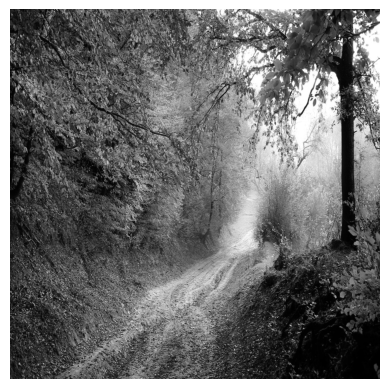

In [12]:
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')
plt.show()

In [13]:
# determine the number of components(largest eigenvectors)
n_components = 50
pca_1 = PCA(n_components)
pca_1.fit(grayscale_image)

#compressing the data
compressed_image_1 = pca_1.compress(grayscale_image)
#printing the shape of compressed data
compressed_image_1.shape

(700, 50)

In [14]:
decompressed_image_1 = pca_1.decompress(compressed_image_1)
decompressed_image_1.shape

(700, 700)

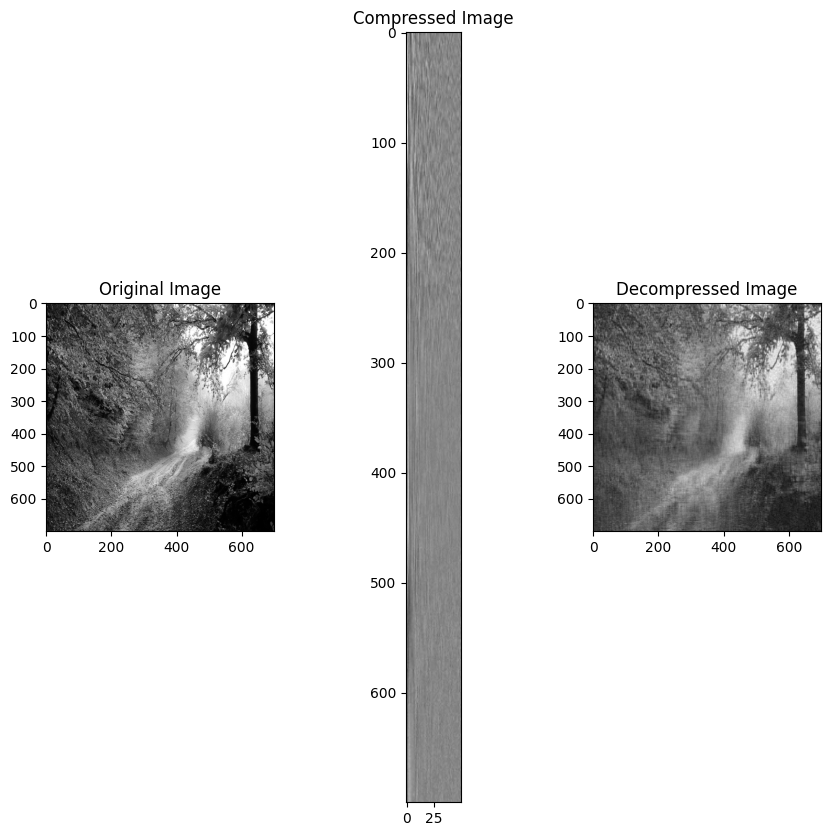

In [15]:
# Visualize the original, compressed, and decompressed images
plt.figure(figsize=(10, 10))

# Original Image
plt.subplot(131)
plt.title("Original Image")
plt.imshow(grayscale_image, cmap='gray')

# Now you can display the real-valued image using plt.imshow
plt.subplot(132)
plt.title("Compressed Image")
plt.imshow(compressed_image_1, cmap='gray')


# Decompressed Image
plt.subplot(133)
plt.title("Decompressed Image")
plt.imshow(decompressed_image_1, cmap='gray')

## Colored Image

In [16]:
# Open the image
test_image = Image.open('/content/sample_data/test_image.jpg')

# Define the new size you want for the image (e.g., 300x300 pixels)
new_size = (300, 300)

# Resize the image
image = test_image.resize(new_size)

# Convert the resized image to a NumPy array
image = np.array(image)

image.shape

(300, 300, 3)

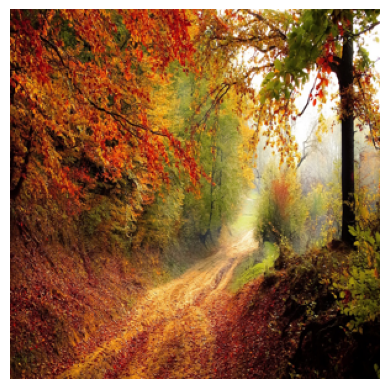

In [17]:
# Plot the image using Matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()

In [18]:
# Separate the RGB channels
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

In [19]:
# Apply PCA to each channel
n_components = 50

pca_red = PCA(n_components)
pca_green = PCA(n_components)
pca_blue = PCA(n_components)

In [20]:
pca_red.fit(red_channel)
pca_green.fit(green_channel)
pca_blue.fit(blue_channel)

In [21]:
# Compress each channel
compressed_red = pca_red.compress(red_channel)
compressed_green = pca_green.compress(green_channel)
compressed_blue = pca_blue.compress(blue_channel)

In [22]:
compressed_image_2 = np.stack((compressed_red, compressed_green, compressed_blue), axis=-1)

In [23]:
# Decompress each channel
decompressed_red = pca_red.decompress(compressed_red)
decompressed_green = pca_green.decompress(compressed_green)
decompressed_blue = pca_blue.decompress(compressed_blue)

In [24]:
# Combine the decompressed channels to reconstruct the RGB image
reconstructed_image = np.stack((decompressed_red, decompressed_green, decompressed_blue), axis=-1)

# # Convert the reconstructed image to uint8 data type
reconstructed_image = reconstructed_image.astype(np.uint8)

reconstructed_image.shape

(300, 300, 3)

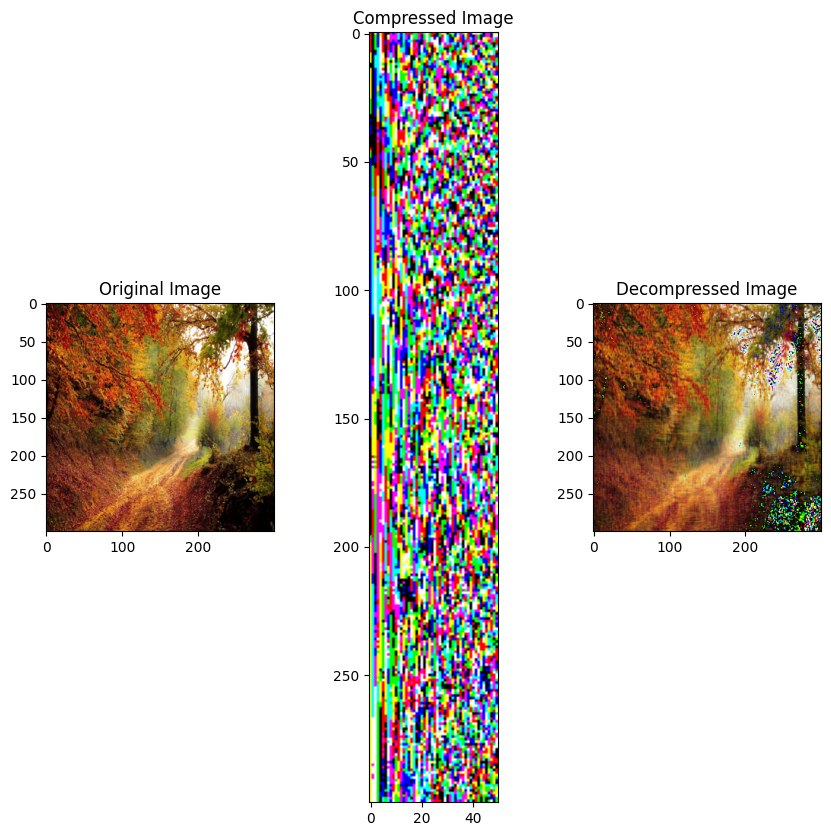

In [25]:
# Visualize the original, compressed, and decompressed images
plt.figure(figsize=(10, 10))

# Original Image
plt.subplot(131)
plt.title("Original Image")
plt.imshow(image)

# Now you can display the real-valued image using plt.imshow
plt.subplot(132)
plt.title("Compressed Image")
plt.imshow(compressed_image_2)


# Decompressed Image
plt.subplot(133)
plt.title("Decompressed Image")
plt.imshow(reconstructed_image)

## Eigne Faces

In [42]:
# Load a sample face dataset from scikit-learn
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Get the flattened image data and standardize it
x = lfw_people.data
x = x / 255.0  # Scale pixel values to [0, 1]

# Define the number of eigenfaces (principal components) to retain
n_components = 200
pca_3 = PCA(n_components)

# Fit the PCA model to the data
pca_3.fit(x)
x.shape

(1288, 1850)

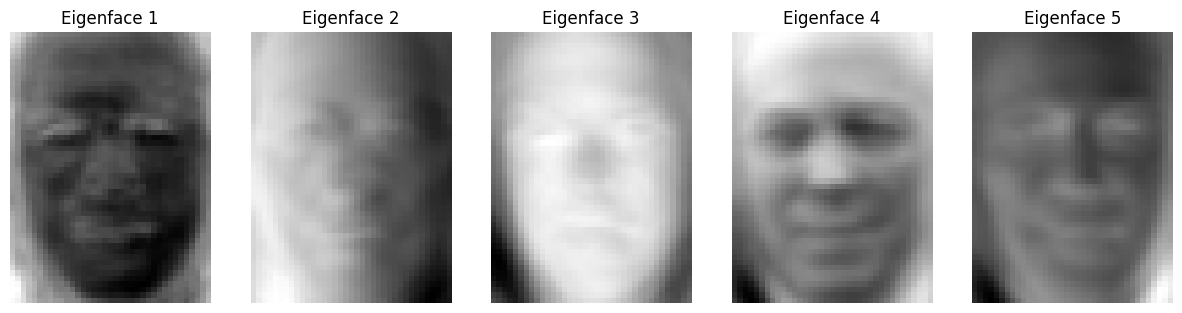

In [43]:
def display_top_eigenfaces(pca_3, n_eigenfaces=5):


    # Extract the top eigenfaces
    eigenfaces = pca_3.eigenvectors[:, :n_eigenfaces]

    # Display the top eigenfaces
    plt.figure(figsize=(15, 5))
    for i in range(min(n_eigenfaces, pca_3.n_components)):
        plt.subplot(1, n_eigenfaces, i + 1)
        eigenface_image = eigenfaces[:, i].reshape(lfw_people.images.shape[1], lfw_people.images.shape[2])
        plt.imshow(eigenface_image, cmap='gray')
        plt.title(f"Eigenface {i + 1}")
        plt.axis('off')
    plt.show()

display_top_eigenfaces(pca_3, n_eigenfaces=5)

In [44]:
compressed_image_3 = pca_3.compress(x)
compressed_image_3.shape

(1288, 200)

In [45]:
decompressed_image_3 = pca_3.decompress(compressed_image_3)
decompressed_image_3.shape

(1288, 1850)

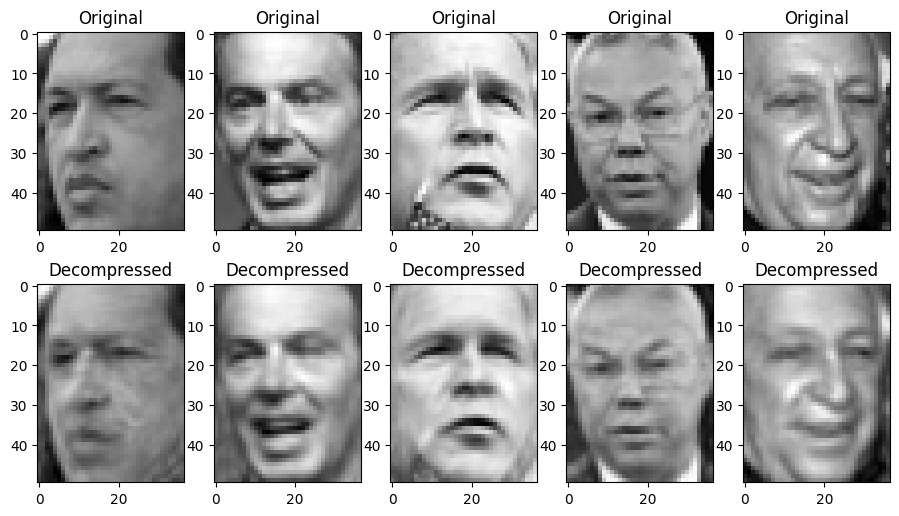

In [46]:
# Display the original and reconstructed images
plt.figure(figsize=(11, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x[i].reshape(lfw_people.images.shape[1], lfw_people.images.shape[2]), cmap=plt.cm.gray)
    plt.title("Original")
    print('\n')
    plt.subplot(2, 5, i + 6)
    plt.imshow(decompressed_image_3[i].reshape(lfw_people.images.shape[1], lfw_people.images.shape[2]), cmap=plt.cm.gray)
    plt.title("Decompressed")

plt.show()